## EDA on Titanic Dataset

In [2]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the dataset
data = pd.read_csv('titanic.csv')

### Basic EDA

In [5]:
# Display top 5 records
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Display last 5 records
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# Get the total number of records & attributes
data.shape

(891, 12)

In [8]:
# Getting statistical info about dataset
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Getting List of column
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Categorical Columns
- Survived
- Pclass
- Sex
- SibSp
- Parch
- Embarked

### Numerical Columns
- PassengerId
- Age
- Fare

In [12]:
# Getting more info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Advance EDA

In [14]:
# Check for Null Values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Observation
- Age,Cabin & Embarked column has missing values
- More than 70% Values are missing in cabin
- There are few col having inappropriate data type

In [16]:
# Drop the Cabin column
data.drop('Cabin', axis=1,inplace=True)

In [17]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
# Impute Missing Values for Age
data['Age'].fillna(data['Age'].mean(),inplace= True)

In [19]:
data['Age'].isnull().sum()

0

In [20]:
# Alternate Approach to replace age values

def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1 :
            return 39
        elif Pclass == 2:
            return 30
        else:
            return 24
    else:
        return Age

In [21]:
data['Age'] = data[['Age','Pclass']].apply(age_approx, axis = 1)

In [22]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [23]:
# Impute Missing Values for Embarked

# Getting most frequent val
d1 = data['Embarked'].mode()
print(d1)

# Fill the val
data['Embarked'].fillna('S',inplace= True)

0    S
Name: Embarked, dtype: object


In [24]:
data['Embarked'].isnull().sum()

0

### Changing the datatype of following col
- Survived, Pclass, Sex, Age, Embarked

In [26]:
# The category data type in pandas is a hybrid data type.
# It looks and behaves like a string in many instances
# but internally is represented by an array of integers.
# This allows the data to be stored more efficiently.

In [27]:
data['Survived'] = data['Survived'].astype('category')
data['Pclass'] = data['Pclass'].astype('category')
data['Sex'] = data['Sex'].astype('category')
data['Age'] = data['Age'].astype('int')
data['Embarked'] = data['Embarked'].astype('category')


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [29]:
# get the 5 point summary
data.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
# Check for Duplicate values
data[data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


### Observation
- There are no Duplicate Values

## Univariate Analysis

In [33]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

out of 891 62 % people died


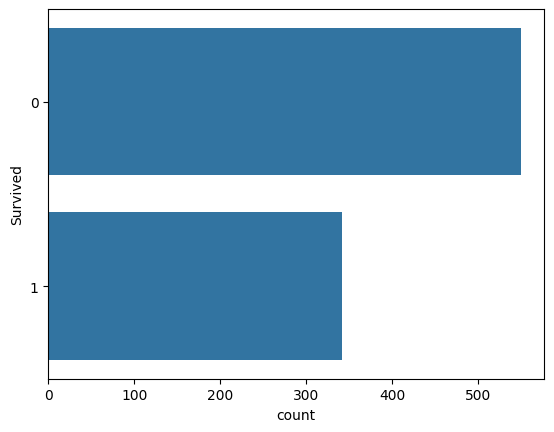

In [34]:
# Survived Column
sns.countplot(data['Survived'])

death_per = round (data['Survived'].value_counts().values[0]/891*100)

# Observation
print('out of 891 {} % people died'.format(death_per))

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='Pclass'>

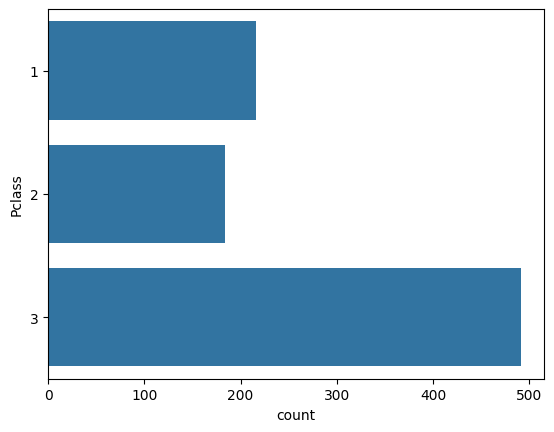

In [35]:
# Pclass Col
print(data['Pclass'].value_counts())
print((data['Pclass'].value_counts()/891)*100)

sns.countplot(data['Pclass'])

### Observation
- Maximum people travelling through class 3
- 491 people travelling through class 3

Sex
male      577
female    314
Name: count, dtype: int64

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='Sex'>

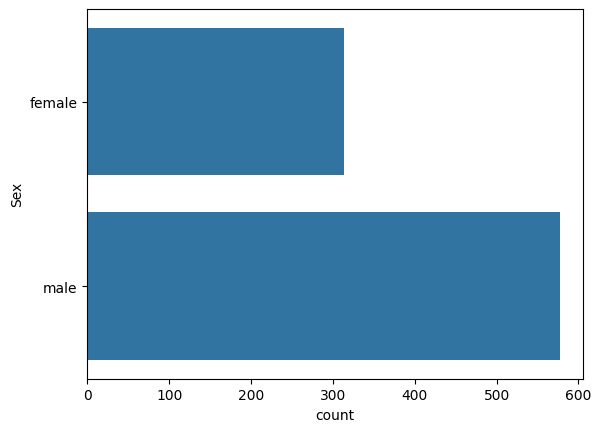

In [37]:
# Sex attribute
print(data['Sex'].value_counts())
print()
print((data['Sex'].value_counts()/891)*100)

sns.countplot(data['Sex'])

### Observation
- Male passengers are more compared to female passengers

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

SibSp
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: count, dtype: float64


<Axes: ylabel='count'>

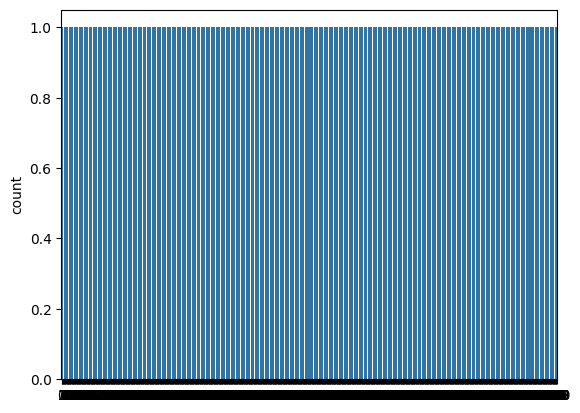

In [39]:
# SibSp attribute
print(data['SibSp'].value_counts())
print()
print((data['SibSp'].value_counts()/891)*100)

sns.countplot(data['SibSp'])

### Observation
- Maximum passengers are not travelling with sibling/spouse or travelling alone
- Around 600 passengers travelling alone
- Around 250 passengers travelling with sibling/spouse

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


<Axes: ylabel='count'>

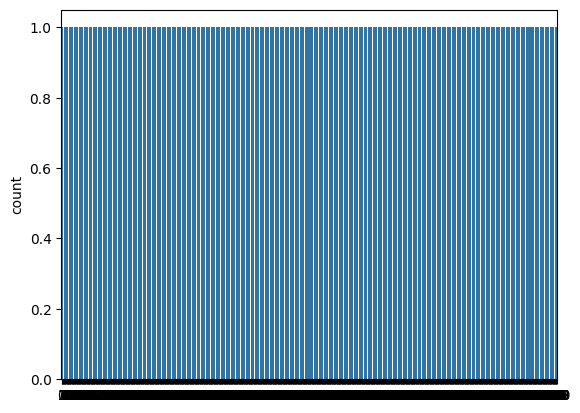

In [41]:
# Parch attribute
print(data['Parch'].value_counts())
print()
print((data['Parch'].value_counts()/891)*100)

sns.countplot(data['Parch'])

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='Embarked'>

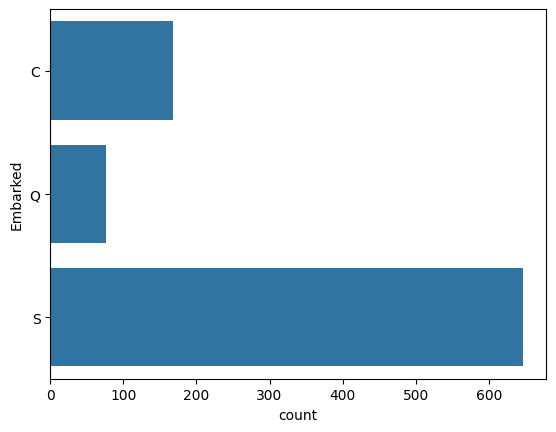

In [42]:
# Embarked attribute
print(data['Embarked'].value_counts())
print()
print((data['Embarked'].value_counts()/891)*100)

sns.countplot(data['Embarked'])

### Observation
- Maximum passengers onboarded in Titanic from station with code S

0.45956263424701577

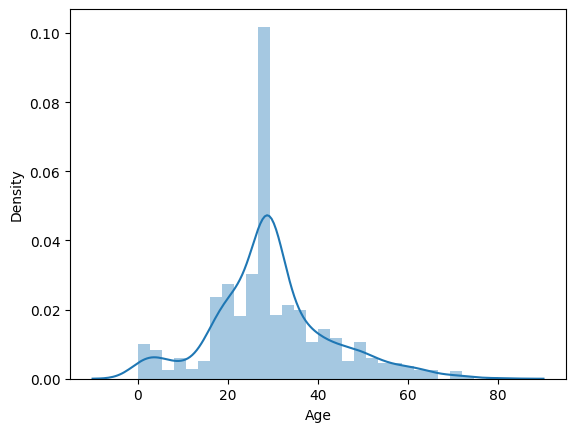

In [44]:
# Distplot for Age
sns.distplot(data['Age'])
data['Age'].skew()

<Axes: ylabel='Age'>

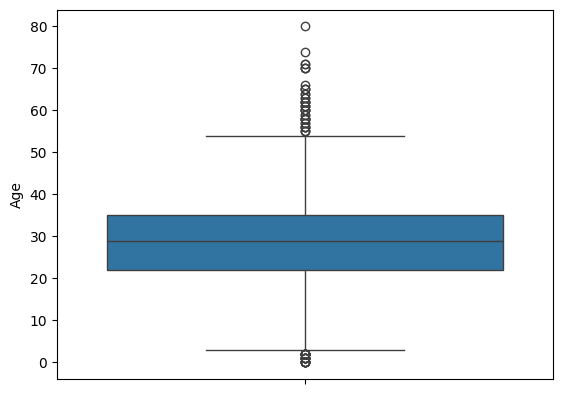

In [45]:
# Boxplot for Age
sns.boxplot(data['Age'])

In [46]:
# Getting more info
print('Number of People having age between 20 to 40 are',data[(data['Age'] >= 20) & (data['Age'] <=40)].shape[0])
print('People having age between 60 to 75 are',data[(data['Age'] >= 60) & (data['Age'] <=75)].shape[0])
print('People having age above 75 is',data[(data['Age'] >= 75)].shape[0])
print('People having age below 1 are',data[(data['Age'] <= 1)].shape[0])

Number of People having age between 20 to 40 are 579
People having age between 60 to 75 are 25
People having age above 75 is 1
People having age below 1 are 14


In [47]:
# Handling the outliers
age = data['Age']

tenth_percentile = np.percentile(age, 10)
ninetieth_percentile = np.percentile(age, 90)

print('10th,tenth_percentile',tenth_percentile)
print('90th,tenth_percentile',ninetieth_percentile)

b = np.where(age<tenth_percentile, tenth_percentile, age)

b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)

data['Age'] = b1


10th,tenth_percentile 16.0
90th,tenth_percentile 47.0


<Axes: ylabel='Age'>

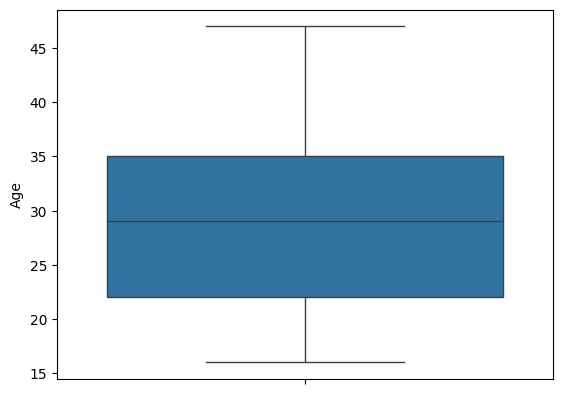

In [48]:
# Boxplot for Age
sns.boxplot(data['Age'])

4.787316519674893

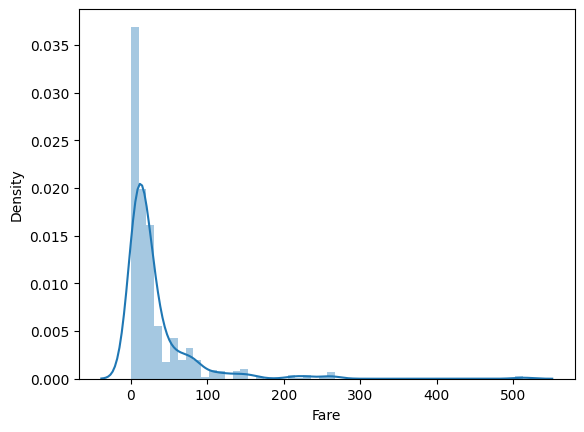

In [49]:
# Distplot for Fare
sns.distplot(data['Fare'])
data['Fare'].skew()

In [50]:
# Getting more info
print('People who paid Fare between 200 and 300$',data[(data['Fare'] >= 200) & (data['Fare']<=300)].shape[0])
print('People who paid Fare greater than 300$',data[(data['Fare'] >= 300)].shape[0])

People who paid Fare between 200 and 300$ 17
People who paid Fare greater than 300$ 3


<Axes: ylabel='Fare'>

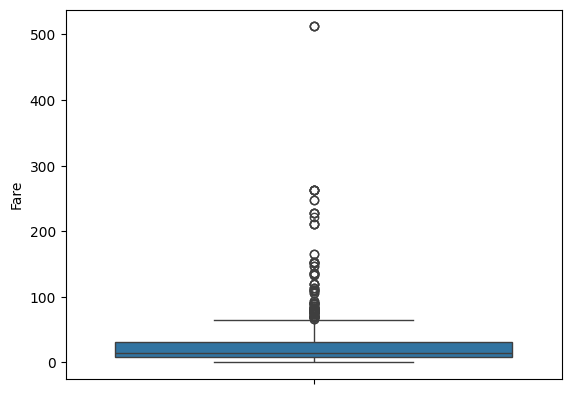

In [51]:
sns.boxplot(data['Fare'])

In [52]:
outlier_list = []
# data1 = data['Fare']

data['Fare'] = sorted(data['Fare'])

q1 = np.percentile(data['Fare'], 25)
q3 = np.percentile(data['Fare'], 75)
print("The Val of Q1 and Q2",q1, q3)

IQR = q3-q1

lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)

    # print("The lower & Upper Bound",lwr_bound, upr_bound)

for i in data['Fare']:
    if (i<lwr_bound or i>upr_bound):
        data['Fare'] = data['Fare'].replace(i,np.median(data['Fare']))




The Val of Q1 and Q2 7.9104 31.0


In [53]:
# verify outliers

for i in data['Fare']:
    if (i<lwr_bound or i>upr_bound):
        print(i)

## Multivariate Analysis

<Axes: xlabel='Age', ylabel='Density'>

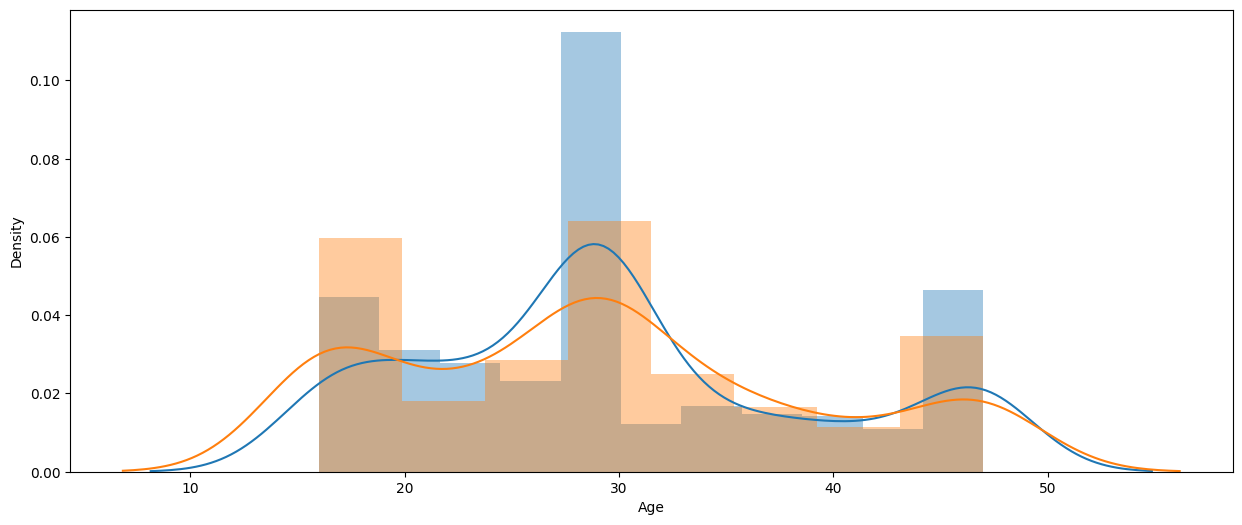

In [55]:
# Survived with Age
plt.figure(figsize=(15,6))
sns.distplot(data[data['Survived']==0]['Age'])
sns.distplot(data[data['Survived']==1]['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

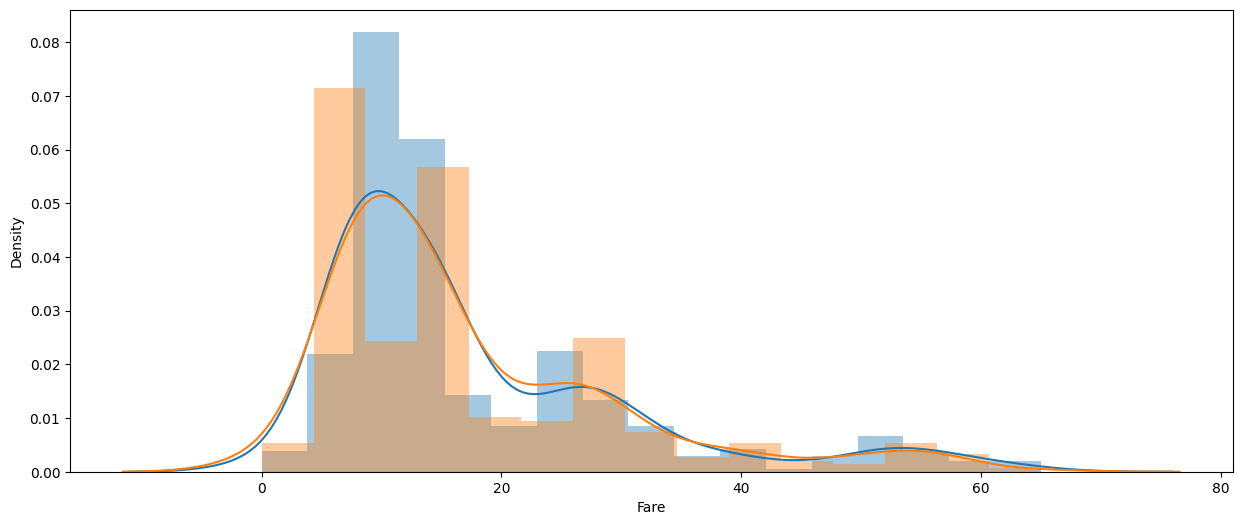

In [56]:
# Survived with Fare
plt.figure(figsize=(15,6))
sns.distplot(data[data['Survived']==0]['Fare'])
sns.distplot(data[data['Survived']==1]['Fare'])

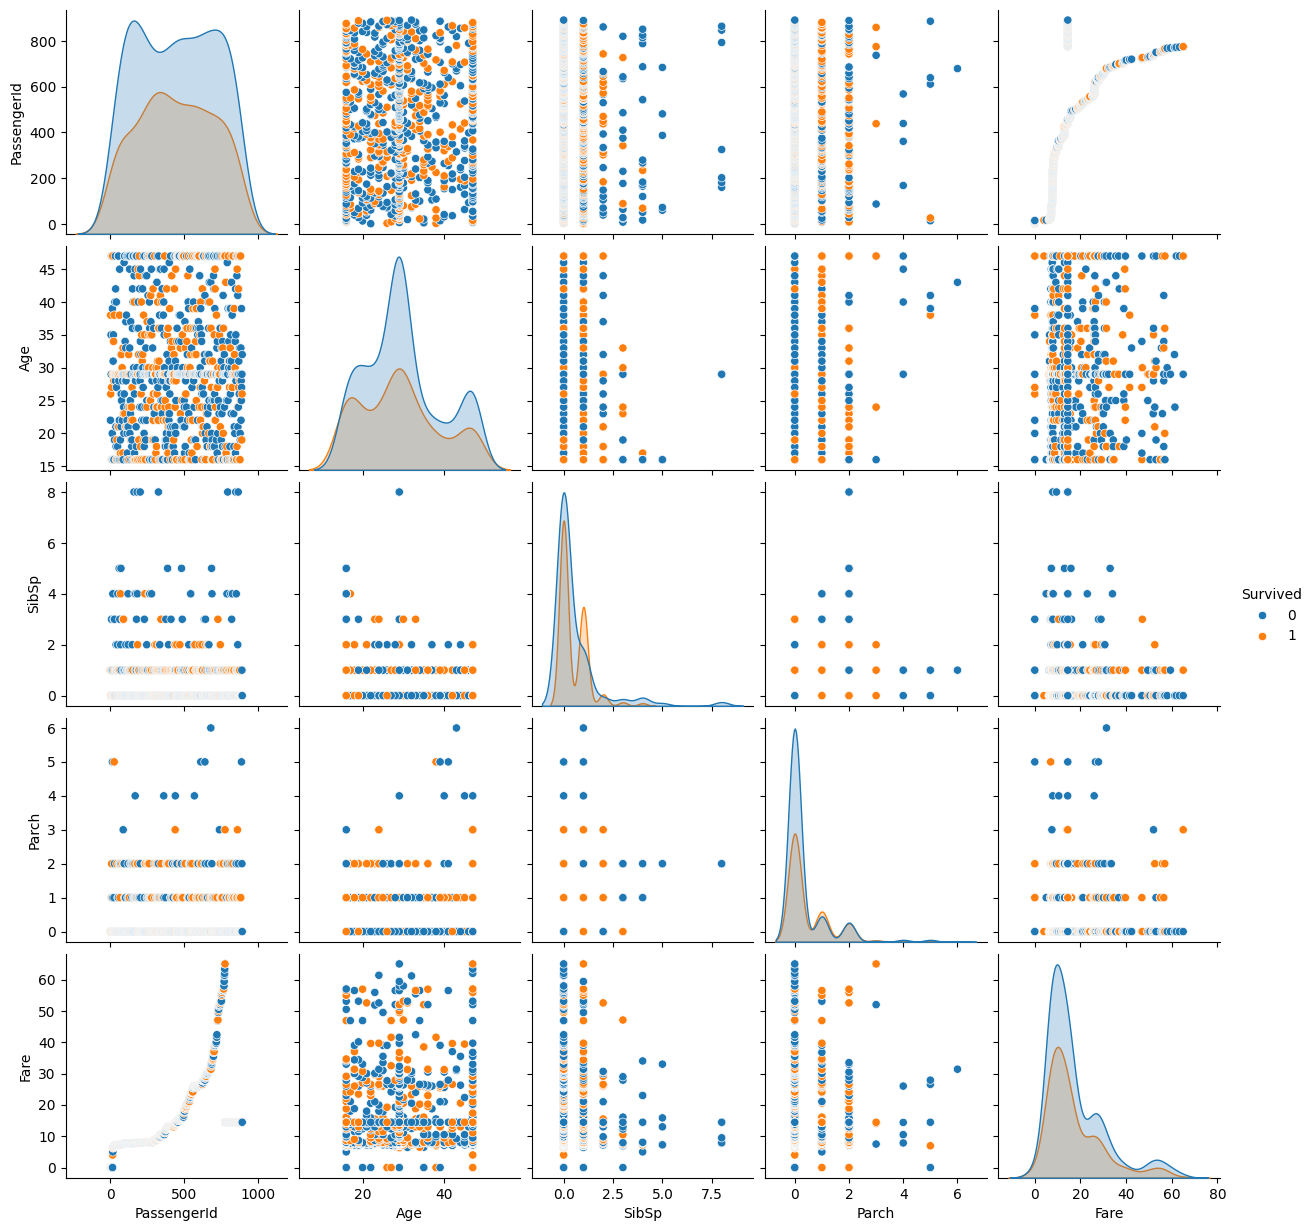

In [57]:
sns.pairplot(data, hue = 'Survived')

<Axes: >

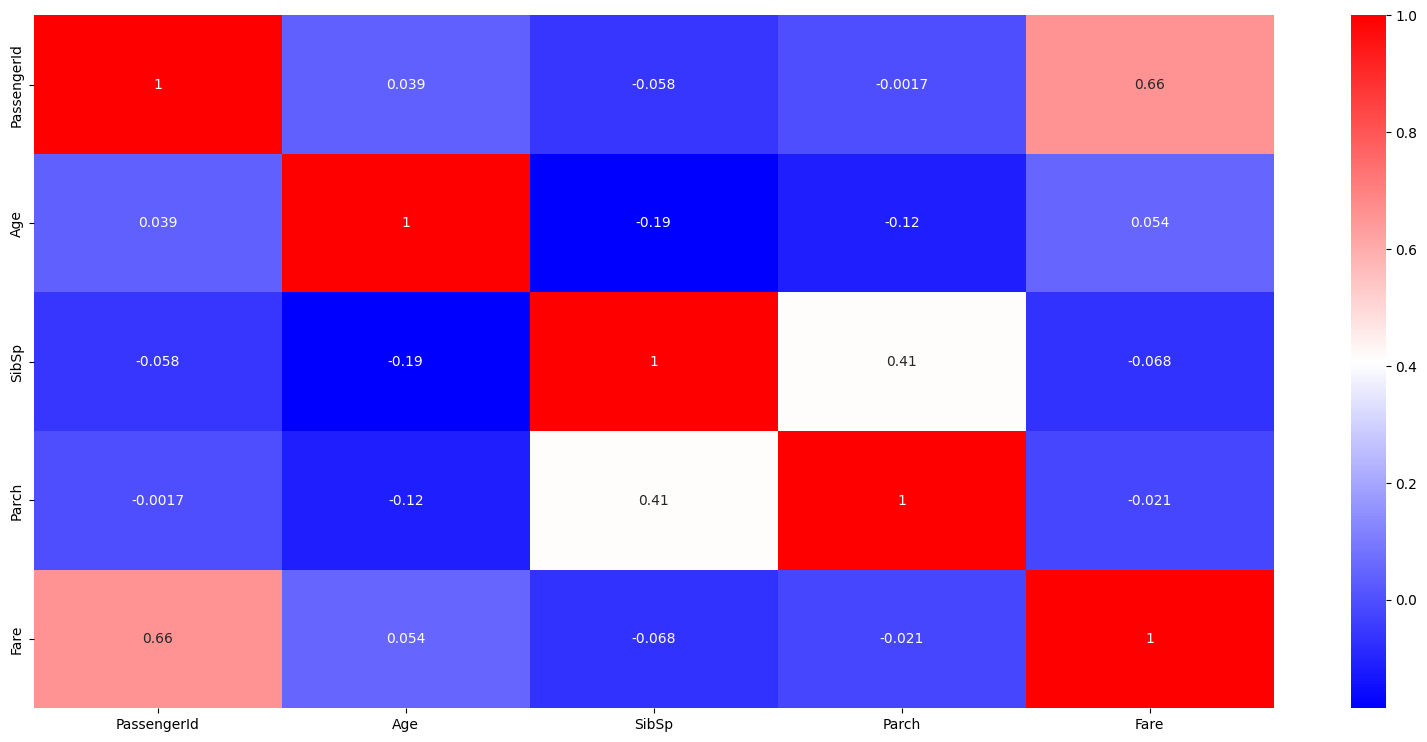

In [58]:
plt.figure(figsize=(20,9))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='bwr')

In [59]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.0,S


In [60]:
# one hot encoding
newdf = pd.get_dummies(data= data, columns = ['Sex','Embarked'], drop_first=True)

In [61]:
newdf.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,0.0,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,0.0,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,0.0,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,0.0,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,0.0,True,False,True


In [62]:
newdf.tail(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,14.4542,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,14.4542,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.0,1,2,W./C. 6607,14.4542,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,14.4542,True,False,False
890,891,0,3,"Dooley, Mr. Patrick",32.0,0,0,370376,14.4542,True,True,False


In [63]:
# Feature Scalling
from sklearn.preprocessing import MinMaxScaler
age_scaler = MinMaxScaler()

newdf[['Age','Fare']] = age_scaler.fit_transform(newdf[['Age','Fare']])

In [64]:
newdf.tail()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
886,887,0,2,"Montvila, Rev. Juozas",0.354839,0,0,211536,0.222372,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",0.096774,0,0,112053,0.222372,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.419355,1,2,W./C. 6607,0.222372,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",0.322581,0,0,111369,0.222372,True,False,False
890,891,0,3,"Dooley, Mr. Patrick",0.516129,0,0,370376,0.222372,True,True,False


## Stastical Analysis

In [66]:
# We have to check is there relationship between survival and gender of passenger

In [67]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.0,S


In [68]:
from scipy.stats import chi2_contingency

In [69]:
# H0: There is no relationship between survived & Gender (Independent)
# H1: There is a relationship between survived & Gender (Dependent)

In [70]:
contingency_table = pd.crosstab(data['Survived'], data['Sex'])
contingency_table

Sex,female,male
Survived,,
0,81,468
1,233,109


In [71]:
# Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("P-value: {:.4f}".format(p_value))

P-value: 0.0000


In [72]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis.There is a significant association between gender and survival rate.")
else:
    print("\nWe fail to reject the null hypothesis.There is no significant association between gender and survival rate")


We reject the null hypothesis.There is a significant association between gender and survival rate.


In [73]:
## Seperation of Variables

In [74]:
# Seperation of dependent & Independent variable
X = newdf[['Pclass', 'Age','SibSp','Parch', 'Fare', 'Sex_male']]
y = newdf['Survived']

In [75]:
# Display Independent var
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,0.193548,1,0,0.000000,True
1,1,0.709677,1,0,0.000000,False
2,3,0.322581,0,0,0.000000,False
3,1,0.612903,1,0,0.000000,False
4,3,0.612903,0,0,0.000000,True
...,...,...,...,...,...,...
886,2,0.354839,0,0,0.222372,True
887,1,0.096774,0,0,0.222372,False
888,3,0.419355,1,2,0.222372,False
889,1,0.322581,0,0,0.222372,True


In [76]:
# Display dependent var
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: category
Categories (2, int64): [0, 1]